In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def bmi_cal(bmi):
    if 18.5 > bmi:
        return ["underfat", "black"]
    if 18.5 <= bmi < 25:
        return ["healthy", "red"]
    if 25 <= bmi < 30:
        return ["overfat", "green"]
    if 30 <= bmi:
        return ["obese", "blue"]

In [3]:
plt.rcParams["figure.figsize"] = [15,10]
plt.style.use('ggplot')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

In [4]:
data = pd.read_csv("./data_f.csv", sep=";", index_col=0)

In [5]:
data

id      pc-1      pc-2      pc-3      pc-4      pc-5      pc-6      pc-7  \
0     9  0.022580 -0.077651  0.034329 -0.014097 -0.003067 -0.028580  0.044091   
1   147 -0.002933 -0.002281  0.002048 -0.005933  0.018367  0.012441  0.013149   
2   145 -0.019405  0.037328 -0.010189 -0.009271  0.002956 -0.036896 -0.020203   
3   149 -0.006522 -0.042083  0.023884 -0.001045  0.024597 -0.006836 -0.025908   
4    42 -0.024842  0.040060 -0.005557  0.046183  0.018903  0.001690 -0.007792   
5    70 -0.010230 -0.017742 -0.001181 -0.000295 -0.017286  0.024223  0.000616   
6    81 -0.081716  0.010647 -0.014260  0.034078 -0.011761  0.026761  0.013884   
7    92  0.063769  0.024538 -0.016177  0.013077  0.006853  0.014114 -0.003796   
8     2  0.040052 -0.033322 -0.020048 -0.031394 -0.023829  0.008238 -0.010673   
9    71 -0.030098 -0.005404 -0.017984 -0.004942 -0.026369  0.036679 -0.008220   
10   84  0.021262 -0.046504 -0.003642  0.015823 -0.043377  0.027840 -0.000986   
11  135  0.002641 -0.022825  0.028543 -0.002834  0.029416  0.011731 -0.023646   
12  117  0.048906 -0.011786  0.016848 -0.004214  0.012753 -0.018516  0.001554   
13   24  0.027002 -0.021177 -0.009846 -0.001425 -0.000734 -0.006869 -0.023986   
14  103 -0.022115 -0.021452  0.039899 -0.003801  0.018888 -0.007507 -0.003335   
15  141  0.020110 -0.056334 -0.015725 -0.013805 -0.000646 -0.001407  0.007369   
16  130  0.047978  0.013458  0.010194 -0.017822  0.016808  0.003704 -0.014610   
17  107 -0.013440  0.016740 -0.015438  0.015882  0.046067  0.011363  0.014139   
18   58 -0.011033  0.025705  0.010805 -0.005668 -0.008231 -0.020076 -0.004592   
19   80 -0.046812  0.001434 -0.050571  0.006540 -0.008348  0.020949  0.015141   
20   38 -0.046810  0.051079 -0.020440 -0.000388  0.021253 -0.016583 -0.009746   
21  125 -0.033932  0.042261 -0.002959  0.009169 -0.016803 -0.021501 -0.009748   
22   91  0.007908 -0.059791  0.013203  0.011402  0.024161  0.020290 -0.020784   
23  106  0.041775  0.048929 -0.014606 -0.044464 -0.001366 -0.031075  0.016132   
24   47 -0.035851 -0.000152  0.023258 -0.002181  0.007755 -0.003436  0.001338   
25   41 -0.031333 -0.015149  0.004126 -0.000815  0.015117 -0.018032  0.004204   
26   97  0.001100 -0.014930 -0.026847  0.008857 -0.033611  0.011395  0.021751   
27   89  0.127164  0.050000 -0.021665 -0.015246  0.001047  0.002507  0.021221   
28   94 -0.051202 -0.012797 -0.005385  0.014162 -0.029691  0.024044 -0.007868   
29  139 -0.002746  0.036675  0.018841  0.025328  0.010486 -0.018843 -0.006919   
..  ...       ...       ...       ...       ...       ...       ...       ...   
58  118  0.055705  0.040846 -0.028053  0.001824 -0.027086  0.000801  0.004026   
59   44 -0.087077  0.023389  0.004125 -0.008218  0.004815 -0.012269  0.015195   
60    5 -0.072266  0.078187  0.099223 -0.056139  0.032044  0.068296  0.018568   
61  154 -0.017960 -0.008176  0.013473 -0.020148 -0.028887 -0.003456 -0.009113   
62   82  0.047598 -0.004550  0.002515 -0.000277 -0.022524 -0.001661 -0.003738   
63  124  0.078413  0.044203  0.029293  0.000604  0.005911  0.007329 -0.011558   
64    4 -0.009373 -0.055477 -0.004311  0.066856  0.029004 -0.007439  0.011307   
65   78 -0.039063 -0.061574  0.016378  0.004551 -0.016701 -0.008539  0.019249   
66   16  0.014351 -0.000450 -0.048662 -0.040503  0.013008 -0.028253  0.021012   
67   74  0.035039 -0.056246  0.012809  0.009376  0.026016  0.020621 -0.030440   
68  114 -0.050147  0.032466 -0.013574  0.012763 -0.008356 -0.013085 -0.021011   
69   25 -0.046674 -0.027323 -0.040755  0.000131 -0.002117 -0.001647  0.007598   
70    1 -0.013865  0.010376  0.018193 -0.063940 -0.003395  0.012994  0.049492   
71   36 -0.016144  0.022030 -0.018635  0.002872  0.028028 -0.019323  0.025166   
72   52 -0.031852 -0.045525 -0.007281 -0.036847 -0.007080 -0.011745 -0.001959   
73   75  0.030084 -0.046762 -0.028569 -0.002632  0.002392 -0.003343  0.010494   
74   39 -0.043084  0.002553  0.023739  0.005565 -0.005573 -0.007728 -0.001589   
75  123 -0.006324  0.002609 -0.02288

In [6]:
x_out = np.array(data[data.columns[1:61]])

In [7]:
sexo = np.array(data["sexo"])

In [8]:
bmi = np.array(data["bmi"])

In [9]:
bmi_l = np.array(list(map( lambda pa: bmi_cal(pa)  ,bmi)))

In [10]:
ict = np.array(data["ict"])
icc = np.array(data["icc"])

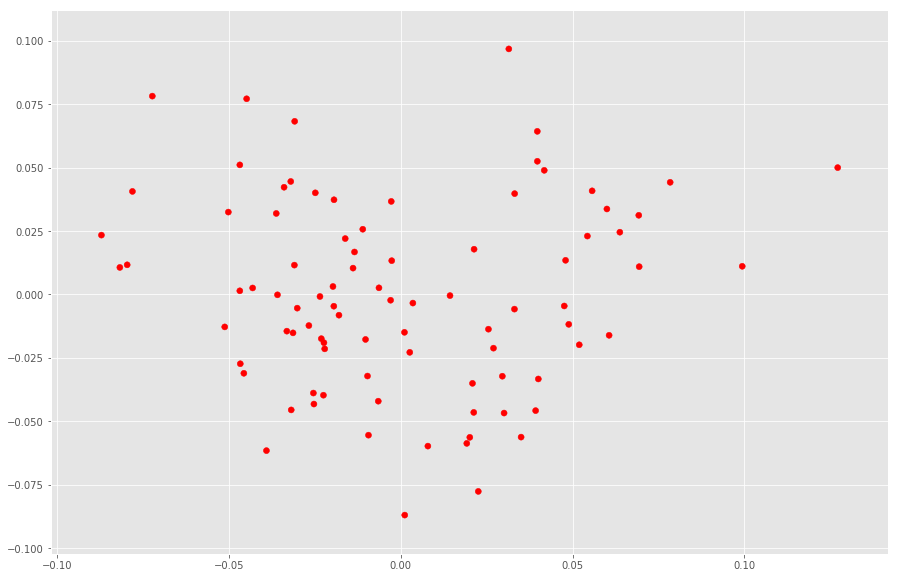

In [11]:
plt.scatter(x_out[:, 0], x_out[:, 1], marker="o", c=sexo)

In [12]:
#centroid_obesity 
centroid_obesity = np.mean(x_out[bmi_l[:,0] =="obese"][:,[0,1]], axis=0)
centroid_healthy = np.mean(x_out[bmi_l[:,0] =="healthy"][:,[0,1]], axis=0)
centroid_overfat = np.mean(x_out[bmi_l[:,0] =="overfat"][:,[0,1]], axis=0)

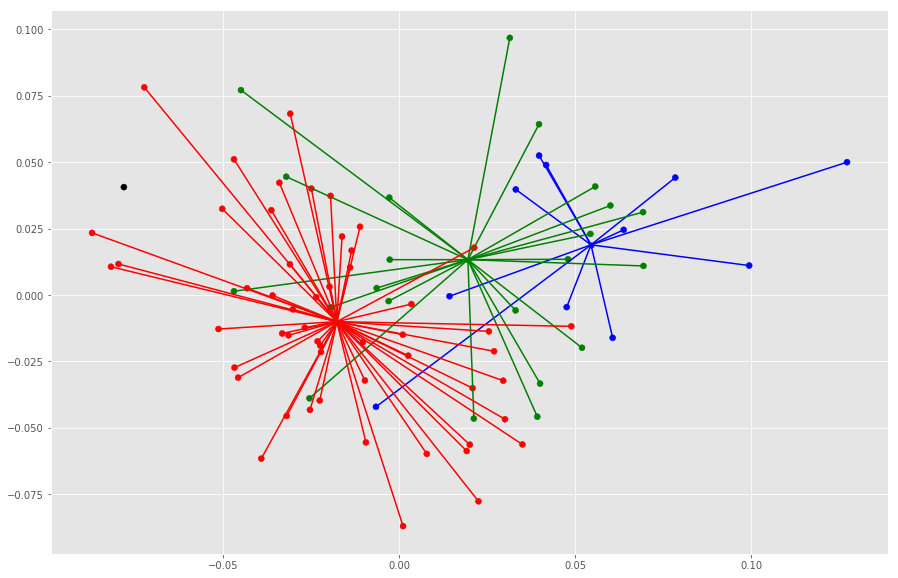

In [13]:
plt.plot(centroid_obesity[0], centroid_obesity[1], ".b", markersize=10)
plt.plot(centroid_healthy[0], centroid_healthy[1], ".r", markersize=10)
plt.plot(centroid_overfat[0], centroid_overfat[1], ".g", markersize=10)

for i in x_out[bmi_l[:,0] =="obese"][:,[0,1]]:
    plt.plot([i[0], centroid_obesity[0]], [i[1], centroid_obesity[1]], "b")

for i in x_out[bmi_l[:,0] =="overfat"][:,[0,1]]:
    plt.plot([i[0], centroid_overfat[0]], [i[1], centroid_overfat[1]], "g")
    
for i in x_out[bmi_l[:,0] =="healthy"][:,[0,1]]:
    plt.plot([i[0], centroid_healthy[0]], [i[1], centroid_healthy[1]], "r")

plt.scatter(x_out[:, 0], x_out[:, 1], marker="o", c=bmi_l[:,1])

r-squared: 0.4321135183652088
p-value: 3.488269811115501e-12


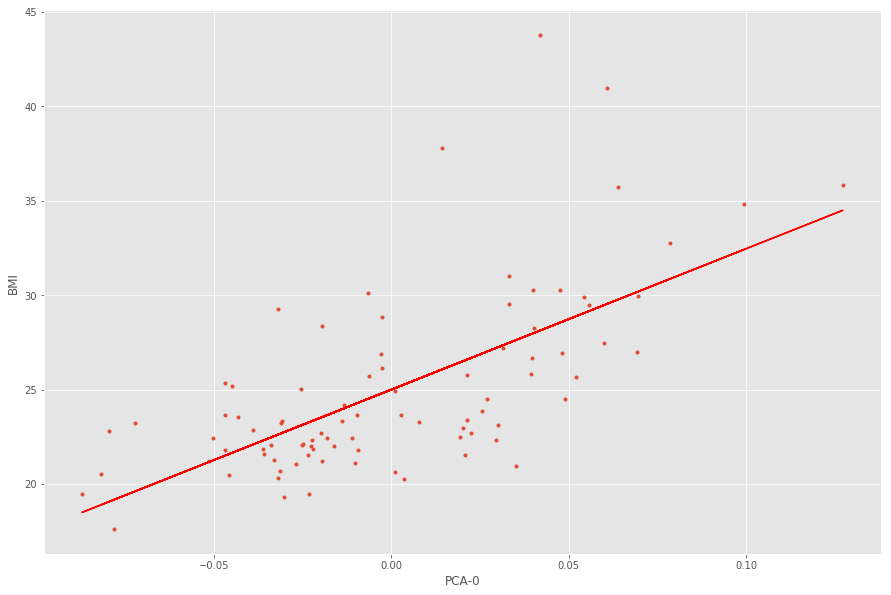

In [14]:
x = np.array(x_out[:, 0], dtype=np.float)
y = bmi
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('BMI')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

r-squared: 0.43383989093932257
p-value: 3.0544241949483105e-12


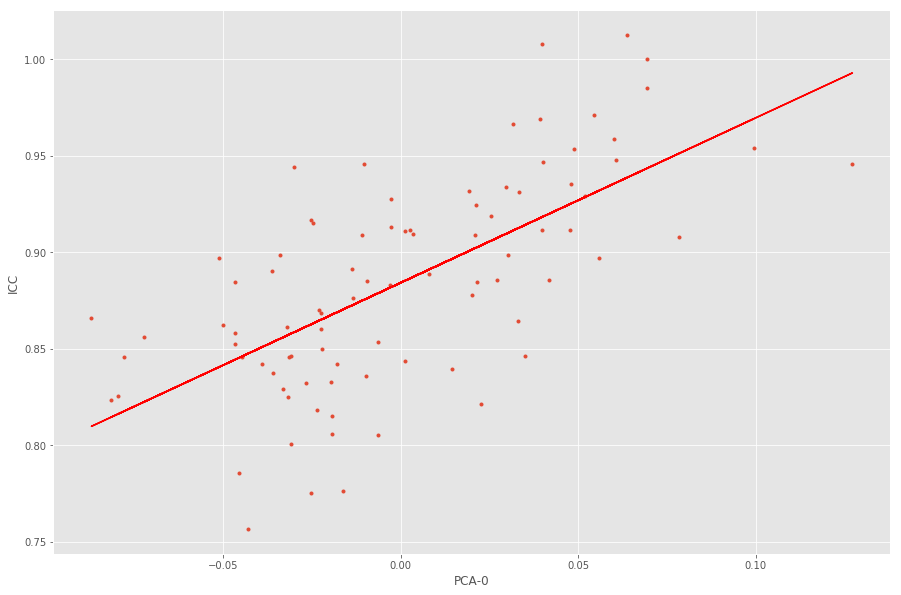

In [15]:
x = np.array(x_out[:, 0], dtype=np.float)
y = icc
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('ICC')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

r-squared: 0.5958873828286401
p-value: 1.3248406485596126e-18


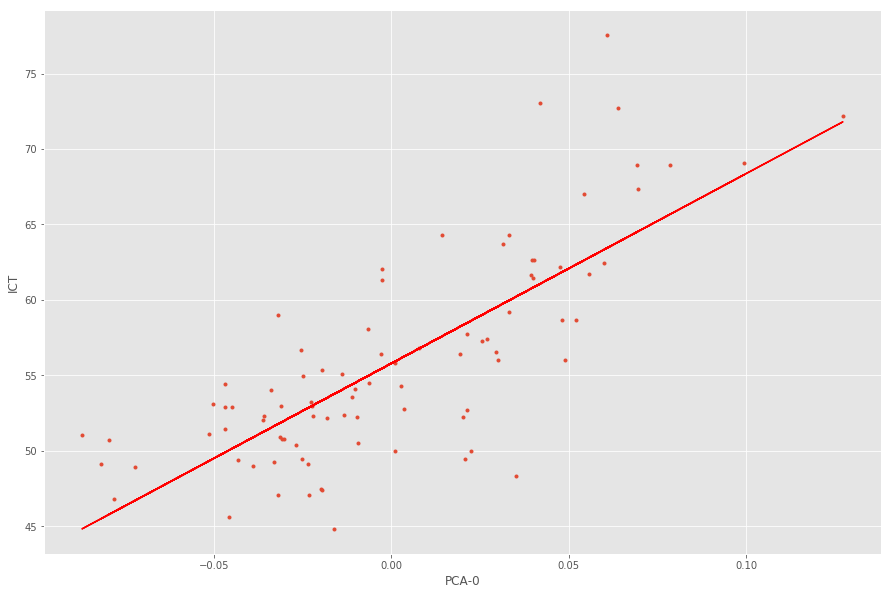

In [16]:
x = np.array(x_out[:, 0], dtype=np.float)
y = ict
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('ICT')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

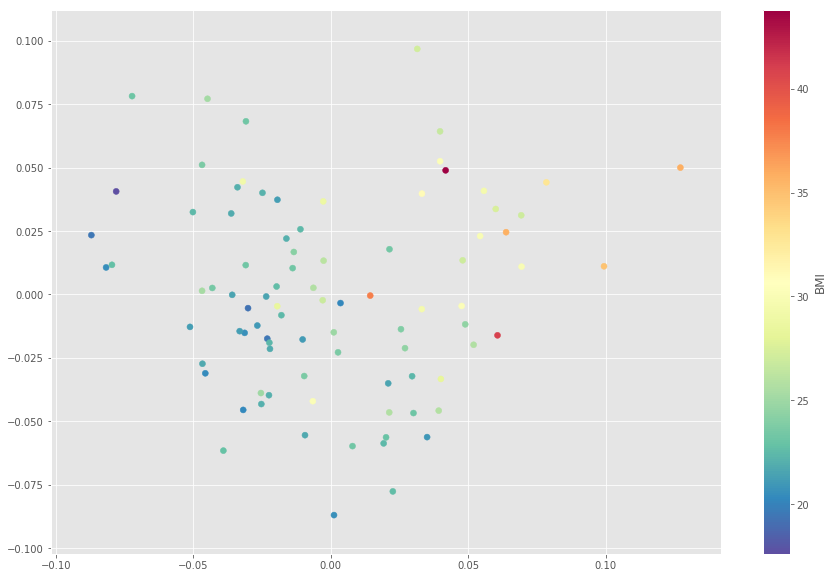

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
s = ax.scatter(x_out[:,0],x_out[:,1],c=bmi,marker="o",cmap=plt.cm.Spectral_r,vmax=bmi.min(),vmin=bmi.max())
cbar = plt.colorbar(mappable=s)
cbar.set_label("BMI")
plt.show()

# para MANOVA / ANCOVA

In [28]:
data["bmi_l"] = bmi_l[:,0]
data.to_csv("data_femeninos.csv", sep=",")